In [2]:
# Image analysis packages

import numpy as np
from skimage.util import crop
import os
import sys
import argparse
import tifffile
from skimage import io
from skimage import exposure
from matplotlib import pyplot as plt

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os, sys
import argparse


# Read H5 file
image = ('/Users/joshtitlow/Downloads/2019_04_26_lothar_josh/20190426_164730_batch.h5')
f = h5py.File(image, 'r')

# Get list of datasets within the H5 file
datasetNames = [n for n in f.keys()]

IOError: Unable to open file (Bad superblock version number)

In [22]:
f

<HDF5 file "mytestfile.hdf5" (mode r+)>

In [1]:
# working with .raw files

# get file
im = np.fromfile('merged.raw', dtype = np.uint16)

# change shape
im = im.reshape(10000, 1024, 414)

# delete first rows in 0 axis
im = np.delete(im,np.s_[0:69],axis=0)

# save file to .raw
im.astype('uint16').tofile('merged2.raw')

IOError: [Errno 2] No such file or directory: 'merged.raw'

In [7]:
# working with .tif files

im = tifffile.imread('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/20180109_200nm_tet_beads1.1547048975113.tif')
im.shape

#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch2_beads.tif',im, imagej = True)

(300, 1024, 1024)

In [41]:
# Ch2 crop
crop_amt = ((0, 0), (0, 0), (610, 0))
ch2 = crop(im,crop_amt)
ch2.shape
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch2_beads.tif',im, imagej = True)

(300, 1024, 414)

In [42]:
# Ch1 crop
crop_amt = ((0, 0), (0, 0), (0, 610))
ch1 = crop(im,crop_amt)
ch1.shape
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch1_beads.tif',im, imagej = True)

(300, 1024, 414)

In [97]:
# get smFISH data from ONI file
im = tifffile.imread('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20181228_20181228_rRNA_PAINT_ATTO655_1in20/20181228_rRNA_PAINT_ATTO655_1in20__LP80_50ms.1546002133942_0.tif')
crop_amt = ((0, 0), (0, 0), (0, 610))
ch1 = crop(im,crop_amt)
ch1.shape
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch1_beads.tif',im, imagej = True)

(1021, 1024, 414)

In [107]:
tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20181228_20181228_rRNA_PAINT_ATTO655_1in20/20181228_rRNA_PAINT_ATTO655_1in20__LP80_50ms.1546002133942_0_ch1.tif',ch1, imagej = True)



In [84]:
# Merge images
#merge = ()
merge = np.append(ch1,ch2)
merge = merge.reshape(2, 300, 1024, 414)
merge.shape

# Change data structure to make image-j happy
print "changing format from:"
print (merge.shape)
merge = np.rollaxis(merge,0,1)
print(merge.shape)
            
#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch1_ch2_beads_huygens.tif',merge, imagej = True)

ValueError: total size of new array must be unchanged

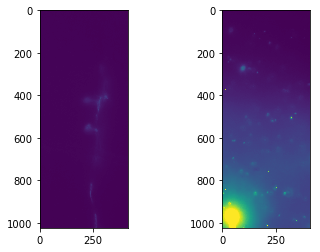

In [58]:
# show images

%matplotlib inline

f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(ch1[10])
f.add_subplot(1,2, 2)
plt.imshow(ch2[10])
plt.show(block=True)

#log_img = exposure.adjust_log(dset, 1)
#gamma_img = exposure.adjust_gamma(dset, 1)
#plt.imshow(dset[0, 15,0], cmap='gray')
#plt.imshow(log_img[0, 15,0], cmap='gray')
#plt.imshow(gamma_img[0, 15,0], cmap='gray')

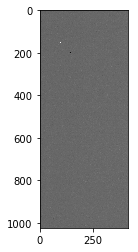

In [106]:
#plt.imshow(ch1[0])
log_img = exposure.adjust_log(ch1[75], 50)
plt.imshow(log_img, cmap='gray')

In [5]:
import numpy as np
import tifffile

im = tifffile.imread('/Users/joshtitlow/tmp/525390.ome.tiff')
im.shape()


TypeError: 'tuple' object is not callable

In [11]:
im = np.asarray(im)
im.shape

(4, 33, 512, 512)

In [6]:
import os
import tifffile
indir = '/Volumes/bioc1301/src/OMERO_scripts/'
infiles =  os.listdir(indir)
for file in infiles:
    try:
        if file.endswith('.tiff'):
            file = os.path.join(indir,file)
            im = tifffile.imread(file)
            print file, im.shape
    except: 
        print file
        pass

/Volumes/bioc1301/src/OMERO_scripts/172637.ome.tiff (4, 22, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/239953.ome.tiff (4, 28, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/242824.ome.tiff (4, 19, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/250970.ome.tiff (4, 12, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/173689.ome.tiff (4, 17, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/190616.ome.tiff (4, 10, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/193557.ome.tiff (4, 34, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/492108.ome.tiff (4, 17, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/190682.ome.tiff (4, 26, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/191108.ome.tiff (4, 35, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/527321.ome.tiff (4, 23, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/149142.ome.tiff (4, 9, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/172704.ome.tiff (4, 38, 512, 512)
/Volumes/bioc1301/src/OMERO_scripts/172729.ome.tiff (4, 13, 512, 512)
/Volumes/bioc1301/src

In [3]:
# working with .tif files

im = tifffile.imread('/Volumes/bioc1301/tmp/smFISH_data/20171013_CS_2colorsmFISH_msp670_570_DAPI_HRP405_p1s3r.ome.tiff')
im.shape

#tifffile.imsave('/Volumes/bioc1301/data/NanoImager/DEFAULT_USER/20190109_20180109/ch2_beads.tif',im, imagej = True)

(3, 37, 512, 512)

In [21]:
import tifffile
from scipy import stats

# specify image file
infile = ('/Volumes/bioc1301/tmp/smFISH_data/20171013_CS_2colorsmFISH_msp670_570_DAPI_HRP405_p1s3r.ome.tiff')

# read image file
im = tifffile.imread(infile)

# load channels into a flattened array
ch1 = im[0].flatten()
ch2 = im[1].flatten()

# Perform pearson correlation (returns coefficient and p-value)
stats.pearsonr(ch1, ch2)

(0.68109566544510924, 0.0)

In [19]:
ch1 = im[0].flatten()
ch2 = im[1].flatten()

#ch1 = np.array([0, 0, 0, 1, 1, 1, 1])
#ch2 = b = np.arange(7)

In [23]:
print(ch1)
print(ch2)

[3991 3980 4504 ..., 5598 5761 5780]
[ 7049  8227  8032 ..., 11284 10316  8582]


data format: (3, 512, 512)
Pearson coef, pvalue: (0.75068466561840519, 0.0)
data format: (3, 512, 512)
Pearson coef, pvalue: (0.76199767756664705, 0.0)
data format: (3, 512, 512)
Pearson coef, pvalue: (0.74781335454502318, 0.0)
data format: (3, 512, 512)
Pearson coef, pvalue: (0.72028028623932339, 0.0)
data format: (3, 512, 512)
Pearson coef, pvalue: (0.17330807423529637, 0.0)


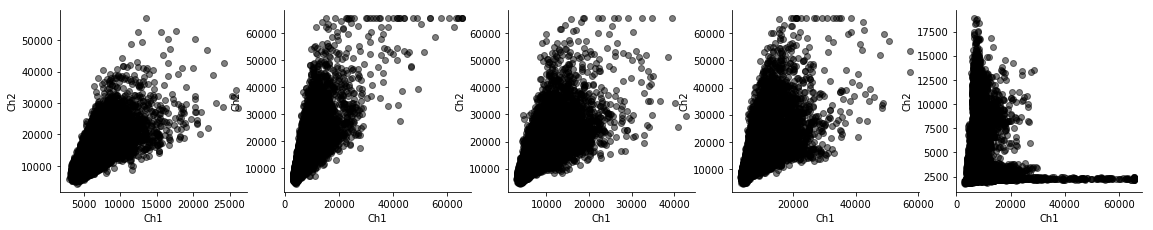

In [68]:
import os
import tifffile
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

# specify directory of images
indir = ('/Volumes/bioc1301/tmp/smFISH_data/')
infiles = os.listdir(indir)

# setup a figure and start counting
fig = plt.figure(figsize = (200,200))
n = 1

# Convert .ome.tiff to .tiff 
for file in infiles: 
    if file.endswith('.tif'):
        if not file.startswith('._'):
            # read image file and show data structure
            im = tifffile.imread(os.path.join(indir, file))
            print 'data format:', im.shape

            # load channels into a flattened array
            ch1 = im[0].flatten()
            ch2 = im[1].flatten()

            # Perform pearson correlation analysis (returns coefficient and p-value)
            pearson = stats.pearsonr(ch1, ch2)
            print 'Pearson coef, pvalue:', pearson

            # plot the data
            #ax = plt.subplot(111)
            ax = fig.add_subplot(50,50,n)
            ax.scatter(ch1,ch2, c='black', alpha=0.5)

            ax.set_xlabel('Ch1', fontsize=10)
            ax.set_ylabel('Ch2', fontsize=10)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
            # iterate
            n+=1

# show the data
plt.show(fig)


In [125]:
c1 = sum(ch1)
print c1
c2 = sum(ch2)
print c2
c1c2 = c1+c2
c1c2/c1
#float(c1+c2/c1)

#sum(c1,c2)/sum(c1)

1664593567
668336871


1

In [74]:
import math
import numpy as np
from numpy.core.umath_tests import inner1d
# inner1d computes inner product on last dimension
# and broadcasts the rest

R,G = 0,1
channelPairs = [(R,G), (R,B), (G,B)]

# safely perform dot product on uint8 arrays
# note the trailing "." to call sum
def safedot(a, b):
return (np.multiply(a,b,dtype=np.uint16).
sum(dtype=np.float64))

# Compute colocalization coefficients on
# the image array
def ccc(ia):
    # means, sumSqMeanErrors are 1x3; others Nx3
    # indicator is dtype bool; others float64
    sumSqs = \
    inner1d(ia.T, ia.T).astype(np.float64)

    sums = \
    ia.sum(axis=0, dtype=np.float64)
    means = sums / ia.shape[0]
    meanErrors = ia - means

    sqMeanErrors = meanErrors**2
    sumSqMeanErrors = sqMeanErrors.sum(axis=0)
    del sqMeanErrors

    indicator = ia>0

    # dict of channelPairs -> respective dot product
    crossDot = {(c1,c2) : safedot(ia[:,c1], ia[:,c2])
    for c1,c2 in channelPairs}

    # dict of channelPairs -> sum of c1, when c2 > 0
    # factored out of loop for readability
    sumIf = {(c1,c2) :
    ia[:,c1][indicator[:,c2]].sum()
    for c1,c2 in channelPairs}

    results = {}
    for c1, c2 in channelPairs:
    k1 = crossDot[(c1,c2)] / sumSqs[c1]
    k2 = crossDot[(c1,c2)] / sumSqs[c2]

    results[(c1,c2)] = {
    "Pearson" :
    (np.dot(meanErrors[:,c1],
    meanErrors[:,c2]) /
    np.sqrt(sumSqMeanErrors[c1] *
    sumSqMeanErrors[c2])),

    "Manders" : math.sqrt(k1*k2),

    "Coloc(m)1" : sumIf[(c1,c2)] / sums[c1],
    "Coloc(m)2" : sumIf[(c2,c1)] / sums[c2],
    "Overlap(k)1" : k1,
    "Overlap(k)2" : k2}

return results

IndentationError: expected an indented block (<ipython-input-74-d83ed26c2b78>, line 13)

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} scikit-image

#conda install -c conda-forge scikit-image